In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("clustering.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
#dropping the load id column
df.drop(["Loan_ID"],axis=1,inplace=True)
df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


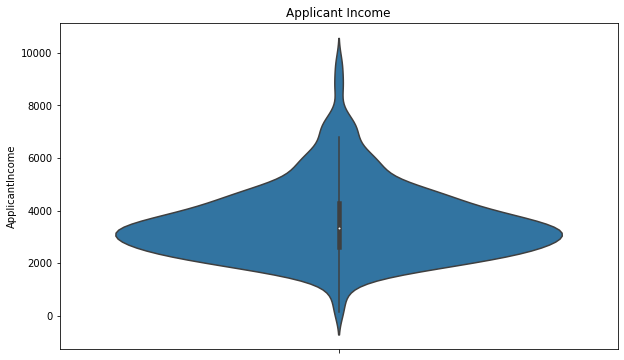

In [4]:
#plotting violinplot for Applicant Income
plt.figure(figsize=(10,6))
plt.title("Applicant Income")
sns.violinplot(y=df["ApplicantIncome"])
plt.show()


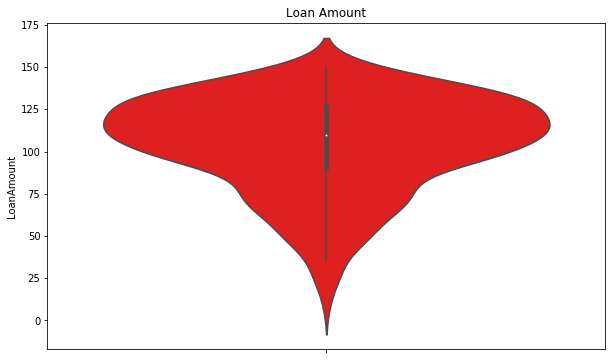

In [5]:
#plotting violinplot for Loan Amount
plt.figure(figsize=(10,6))
plt.title("Loan Amount")
sns.violinplot(y=df["LoanAmount"],color='red')
plt.show()

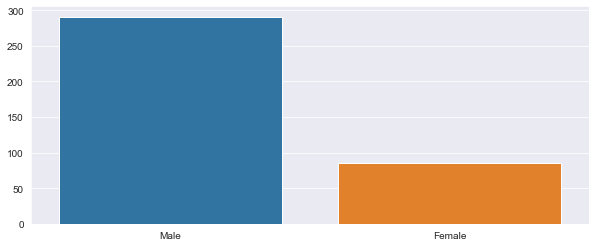

In [6]:
genders=df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index,y=genders.values)
plt.show()

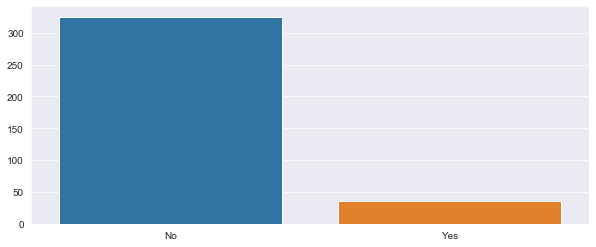

In [7]:
Self_employed=df.Self_Employed.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Self_employed.index,y=Self_employed.values)
plt.show()

In [8]:
y1=df.groupby('ApplicantIncome')['LoanAmount'].sum()
y1

ApplicantIncome
150     135.0
210      98.0
645     113.0
1000    110.0
1025    112.0
        ...  
7740    128.0
8624    150.0
8750    130.0
9323     75.0
9703    112.0
Name: LoanAmount, Length: 322, dtype: float64

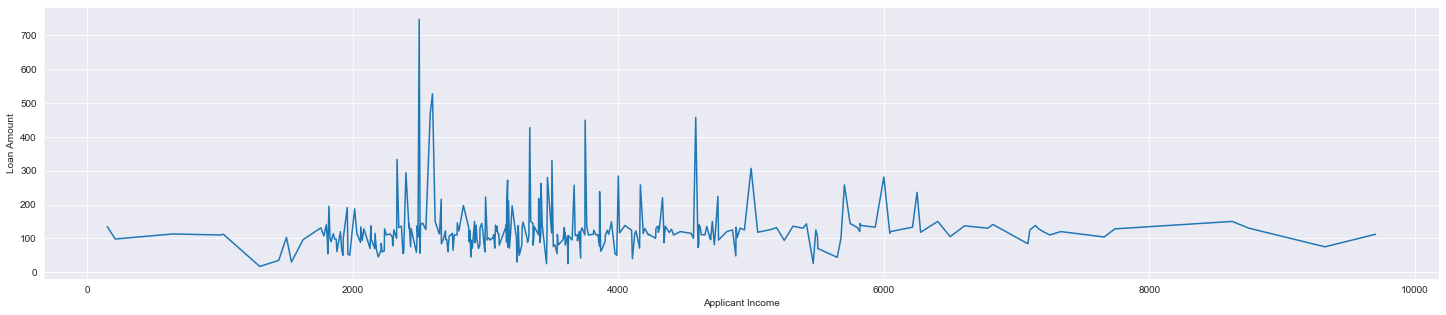

In [9]:
y1.plot.line(figsize=(25,5))
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [10]:
# df.drop(["Loan_Status"],axis=1,inplace=True)
# df.drop(["Property_Area"],axis=1,inplace=True)
# df.drop(["Married"],axis=1,inplace=True)
# df.drop(["Self_Employed"],axis=1,inplace=True)
# df.drop(["Gender"],axis=1,inplace=True)
# df.drop(["Education"],axis=1,inplace=True)


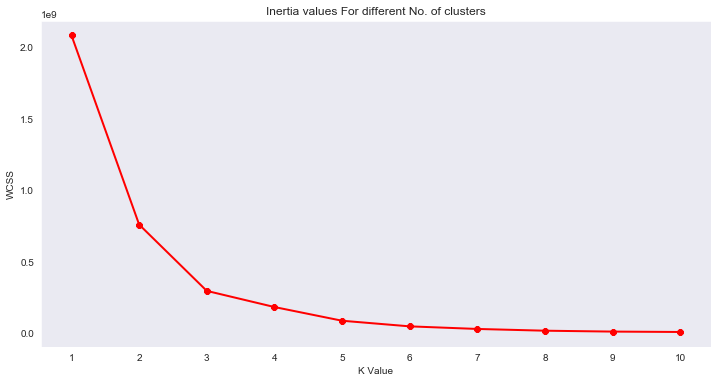

In [12]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,6:8])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.title("Inertia values For different No. of clusters")
plt.show()

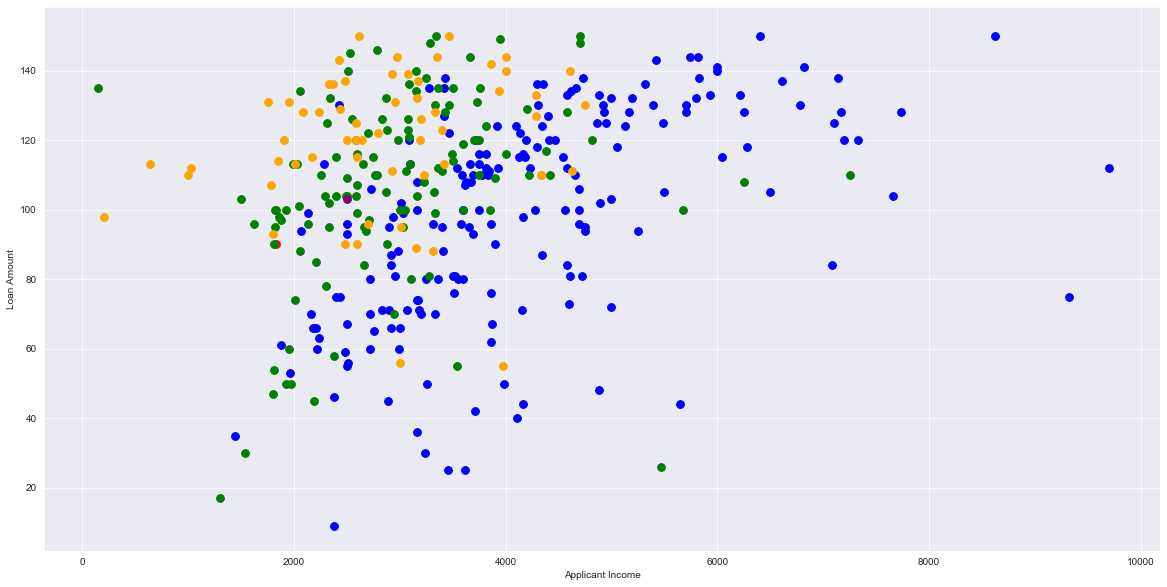

In [24]:
km = KMeans(n_clusters=6)
clusters = km.fit_predict(df.iloc[:,6::8])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(df["ApplicantIncome"][df.label == 0], df["LoanAmount"][df.label == 0], c='blue', s=60)
ax.scatter(df["ApplicantIncome"][df.label == 1], df["LoanAmount"][df.label == 1], c='red', s=60)
ax.scatter(df["ApplicantIncome"][df.label == 2], df["LoanAmount"][df.label == 2], c='green', s=60)
ax.scatter(df["ApplicantIncome"][df.label == 3], df["LoanAmount"][df.label == 3], c='orange', s=60)
ax.scatter(df["ApplicantIncome"][df.label == 4], df["LoanAmount"][df.label == 4], c='purple', s=60)
# ax.view_init(30, 185)
# plt.xlabel("CoapplicantIncome")
plt.xlabel("Applicant Income")
ax.set_ylabel('Loan Amount')
plt.show()